**Лабораторна робота 2.**

Фільтрація зображень

**Мета**: вивчити принципи низькочастотної та високочастотної фільтрації зображень на мові Python.

**Середовище розробки**: Google Colaboratory

**Завдання**
-	Для довільного растрового зображення виконайте гаусівське розмиття зі стандартним відхиленням 2, 5, 10.
-	Альтернативою вирівнювання гістограми є метод нормалізації зображення за допомогою обчислення зображення-частки. Його отримують шляхом поділу вихідного зображення на його розмиту версію I / (I * Gσ). Реалізуйте цю операцію та протестуйте її на довільному зображення.
-	Знайдіть контури простих об’єктів на бінарному зображенні (наприклад, квадрату на білому фоні) за допомогою обчислення градієнтів.
-	Реалізуйте операцію нерізкого маскування (http://en.wikipedia.org/wiki/Unsharp_masking). Для цього спочатку розмийте зображення, а потім відніміть розмиту версію від оригіналу. Це дасть ефект підвищення різкості зображення. Спробуйте застосувати операцію до кольорових та напівтонових зображень.
За результатами виконання роботи підготуйте та захистіть звіт.


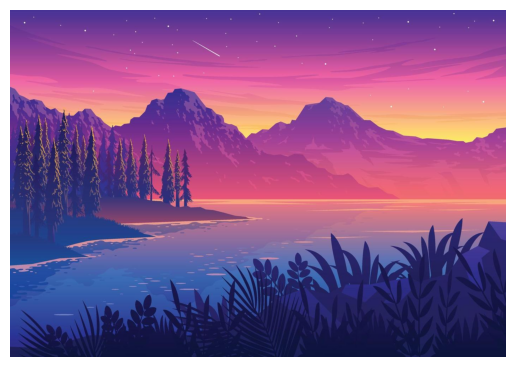

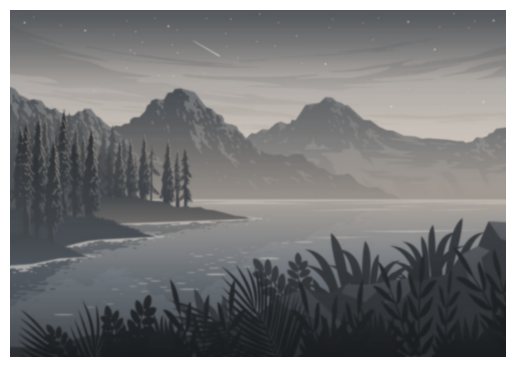

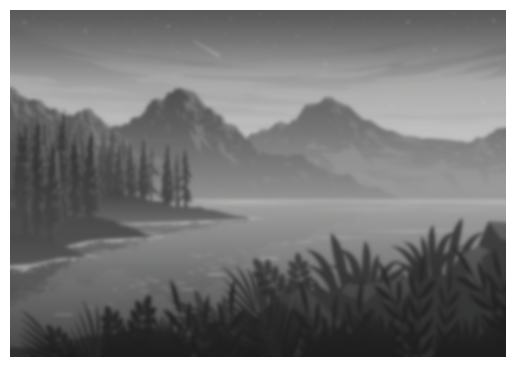

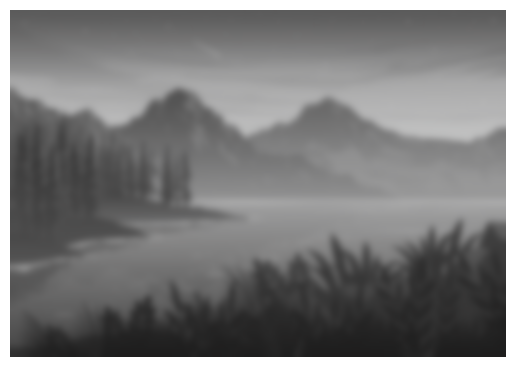

In [7]:
# ⦁	Для довільного растрового зображення виконайте гаусівське розмиття зі стандартним відхиленням 2, 5, 10.
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np
#from scipy.ndimage import filters
from scipy.ndimage import gaussian_filter
def display(im, cmap=None):
  plt.imshow(im, cmap=cmap)
  plt.axis("off")
  plt.show()
im=np.array(Image.open('example.jpg'))
display(im)
im2 = gaussian_filter(im, 2)
display(im2)
im5 = gaussian_filter(im, 5)
display(im5)
im10 = gaussian_filter(im, 10)
display(im10)

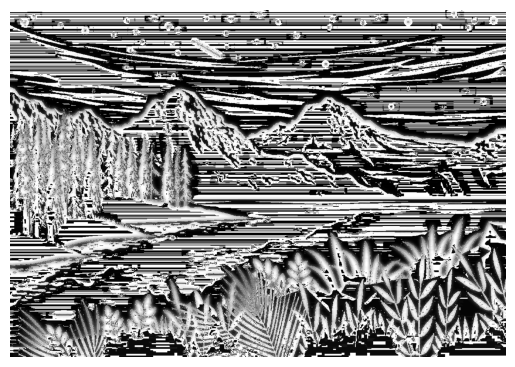

In [10]:
# ⦁	Альтернативою вирівнювання гістограми є метод нормалізації зображення за допомогою обчислення зображення-частки.
# Його отримують шляхом поділу вихідного зображення на його розмиту версію I / (I * Gσ).
# Реалізуйте цю операцію та протестуйте її на довільному зображення.
def normalize_image(img_array, sigma):
    blurred_img = gaussian_filter(img_array, sigma=sigma)
    normalized_img = img_array / blurred_img
    normalized_img = np.clip(normalized_img, 0, np.inf)
    normalized_img = Image.fromarray(np.uint8(255 * normalized_img))
    return normalized_img

img = Image.open('example.jpg').convert('L')
img_array = np.array(img)
normalized_img = normalize_image(img_array, sigma=5)
display(normalized_img, cmap='gray')

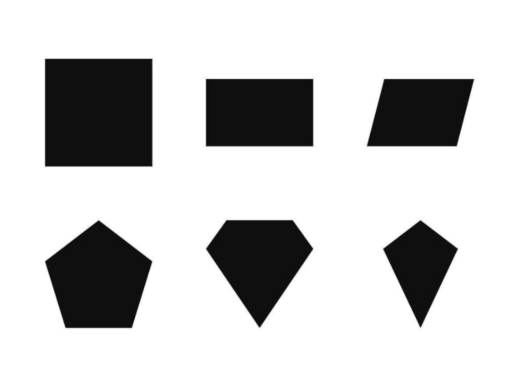

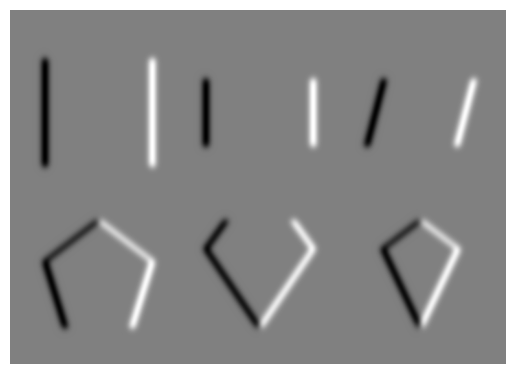

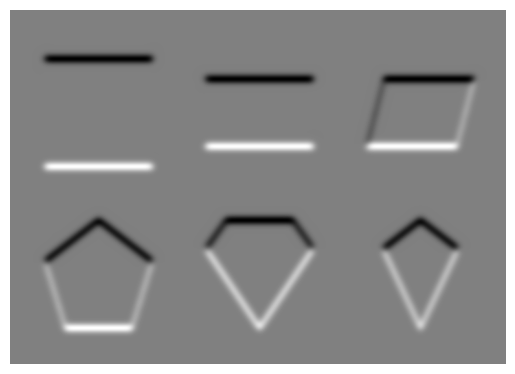

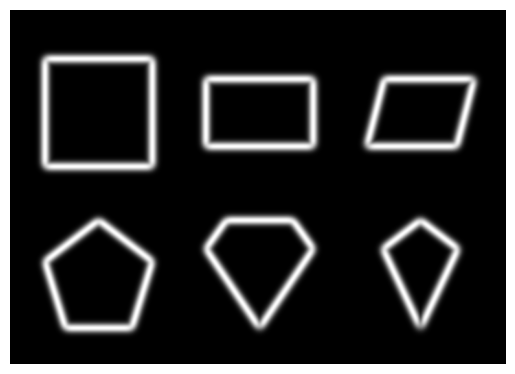

In [23]:
# ⦁	Знайдіть контури простих об’єктів на бінарному зображенні (наприклад, квадрату на білому фоні) за допомогою обчислення градієнтів.
from scipy.ndimage import sobel
def find_contours(binary_image):
    sobel_x = sobel(binary_image, axis=0)
    sobel_y = sobel(binary_image, axis=1)
    gradient = np.hypot(sobel_x, sobel_y)

    return sobel_x, sobel_y, gradient

def find_contours(binary_image, sigma=5):
    imx = np.zeros(binary_image.shape)
    gaussian_filter(binary_image,(sigma,sigma),(0,1),imx)
    imy = np.zeros(binary_image.shape)
    gaussian_filter(binary_image,(sigma,sigma),(1,0),imy)
    gradient = np.hypot(imx, imy)

    return imx, imy, gradient

img = Image.open('shapes.png').convert('L')
display(img, cmap='gray')
img_array = np.array(img)
imx, imy, gradient = find_contours(img_array)
display(imx, cmap='gray')
display(imy, cmap='gray')
display(gradient, cmap='gray')

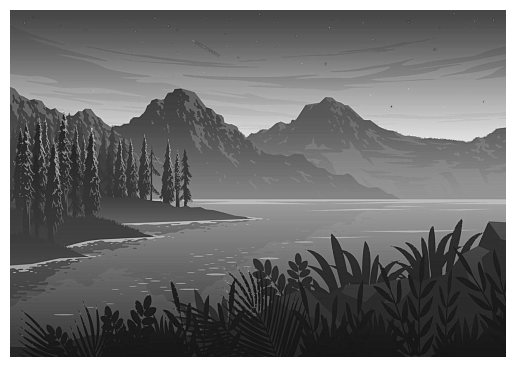

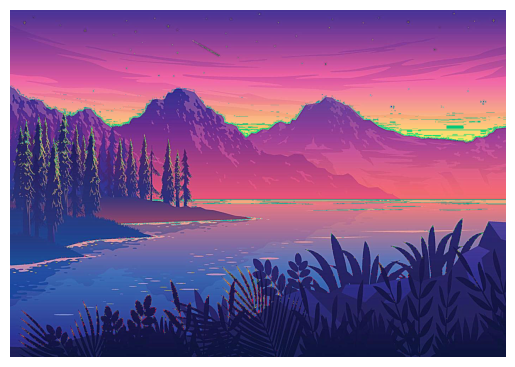

In [93]:
# Реалізуйте операцію нерізкого маскування (http://en.wikipedia.org/wiki/Unsharp_masking).
# Для цього спочатку розмийте зображення, а потім відніміть розмиту версію від оригіналу.
# Це дасть ефект підвищення різкості зображення. Спробуйте застосувати операцію до кольорових та напівтонових зображень.
def unsharp_mask(img_array, sigma, amount):
  blurred_img = gaussian_filter(img_array, sigma=sigma)
  sharpened_img = img_array + amount * (img_array - blurred_img)
  sharpened_img = np.clip(sharpened_img, 0, 255)
  sharpened_img = Image.fromarray(np.uint8(sharpened_img))
  return sharpened_img

def unsharp_mask_3(img_array, sigma=2, amount=1.5):
    # Apply unsharp masking to each channel separately
    sharpened_channels = []
    for channel in range(img_array.shape[-1]):
        channel_data = img_array[:, :, channel]
        blurred_channel = gaussian_filter(channel_data, sigma=sigma)
        #sharpened_channel = channel_data - amount * blurred_channel
        sharpened_channel = channel_data + amount * (channel_data - blurred_channel)
        sharpened_channels.append(sharpened_channel)

    sharpened_img = np.stack(sharpened_channels, axis=-1)
    sharpened_img = np.clip(sharpened_img, 0, 255)
    #sharpened_image = Image.fromarray(np.uint8(sharpened_img))

    return sharpened_img

im = Image.open('example.jpg')
img=np.array(im)
img_gray = np.array(im.convert('L'))
sharpened_img = unsharp_mask(img_gray, sigma=2, amount=1)
display(sharpened_img, cmap='gray')
sharpened_img = unsharp_mask_3(img, sigma=2, amount=1)
display(sharpened_img)

**Висновки**

У ході лабораторної роботи було виконано гаусівське розмиття зі стандартним відхиленням 2, 5, 10. Також було реалізовано метод нормалізації зобрадення за допомогою обчислення зображення частки, знайдено контери зображень за допомогою пошуку градієнтів за допомогою фільтра Собеля та Гаусівського розмиття, а також реалізоване операцію нерізкого маскування. Найбільшою проблемою були додаткові шуми помітні на кольор